<table style="font-size: 1em; padding: 0; margin: 0;">
<p style="border: 1px solid #ff5733; border-left: 15px solid #ff5733; padding: 10px; text-align:justify;">
    <strong style="color: #ff5733">Deliverable</strong>  
    <br/>The deliverable for Part 3 is a jupyter notebook showing a workflow to set up U-Net models for training using NWPU-RESISC45 lake images and corresponding labels. This will mostly test your understanding of the generic workflow of setting up multiple models for sequential training, in order to evaluate and compare model outputs and ultimately decide which model is best for the task, as well as how to implement custom conditional random fields for refining labels and segmentations in Parts 4 and 5.
    </p>

# Primera parte : NWPU-RESISC45 lake images and corresponding labels

In [1]:
import json, os, glob
import numpy as np
import rasterio
import matplotlib
import matplotlib.pyplot as plt
# import some drawing tools from PIL
from PIL import Image, ImageDraw
%matplotlib inline

### Generacion mascara para imagenes nwpu_images

In [10]:
# Funcion : prepara los datos, extrayendo las coordenadas de todos los poligonos desde un arreglo desde un json
def preparar_datos(data, images, i):
    X = []; Y = [] #pre-allocate lists to fill in a for loop
    for k in data[images[i]]['regions']: #cycle through each polygon
        # get the x and y points from the dictionary
        X.append(data[images[i]]['regions'][k]['shape_attributes']['all_points_x'])
        Y.append(data[images[i]]['regions'][k]['shape_attributes']['all_points_y'])
    # make a plot of the image, create a title (the image filename)    
    #plt.imshow(all_images[i])
    #plt.title(images[i])
    # plot each polygon and turn the axes off
    #for k in range(len(X)):
    #    plt.plot(Y[k],X[k])
    #plt.axis('off')
    snombre=images[i]
    return Y,X,snombre #image coordinates are flipped (volteadas) relative to json coordinates

In [11]:
# Funcion : genera la mascara a partir de las coordenadas extraida de un json
# y genera una mascara de tamaño similar a imagen asociada 
def genera_mascara(all_images,X,Y,i):
    # get the dimensions of the image
    nx, ny, nz = np.shape(all_images[i])
    mask = np.zeros((ny,nx))
    
    for x,y in zip(X,Y):
        # the ImageDraw.Draw().polygon function we will use to create the mask
        # requires the x's and y's are interweaved-entrelazados, which is what the following
        # one-liner does    
        polygon = np.vstack((x,y)).reshape((-1,),order='F').tolist()

        # create a mask image of the right size and infill according to the polygon
        if nx>ny:
            x,y = y,x 
            img = Image.new('L', (ny, nx), 0)
        elif ny>nx:
            x,y = y,x 
            img = Image.new('L', (ny, nx), 0)            
        else:
            img = Image.new('L', (nx, ny), 0)

        ImageDraw.Draw(img).polygon(polygon, outline=1, fill=1)
        # turn into a numpy array
        #m = np.array(img)
        #mask = mask + m
        m = np.flipud(np.rot90(np.array(img)))
        try:
            mask = mask + m
        except:
            mask = mask + m.T
    return mask

### Archivo : nwpu_labels\nwpu_lakes_30samples.json

In [12]:
data1 = json.load(open('nwpu_labels'+os.sep+'nwpu_lakes_30samples.json'))
images1 = sorted(data1.keys())
print(images1)
print(len(images1))

['lake_001.jpg', 'lake_002.jpg', 'lake_003.jpg', 'lake_004.jpg', 'lake_005.jpg', 'lake_006.jpg', 'lake_007.jpg', 'lake_008.jpg', 'lake_009.jpg', 'lake_010.jpg', 'lake_011.jpg', 'lake_012.jpg', 'lake_013.jpg', 'lake_014.jpg', 'lake_015.jpg', 'lake_016.jpg', 'lake_017.jpg', 'lake_018.jpg', 'lake_019.jpg', 'lake_020.jpg', 'lake_642.jpg', 'lake_648.jpg', 'lake_660.jpg', 'lake_678.jpg', 'lake_681.jpg', 'lake_682.jpg', 'lake_690.jpg', 'lake_693.jpg', 'lake_694.jpg', 'lake_695.jpg']
30


In [13]:
all_images1 = []
for image in images1:
    with rasterio.open('nwpu_images'+os.sep+'data'+os.sep+image) as dataset:
        all_images1.append(dataset.read().T)

In [14]:
sup=len(images1)
for i in range(0,sup):
    X,Y,stitle = preparar_datos(data1,images1,i)
    #print(stitle)
    mascara = genera_mascara(all_images1,X,Y,i)
    #mascara1 = mascara.T
    # Graba la mascara en una carpeta con el nombre de la imagen asociada
    matplotlib.image.imsave('nwpu_mask'+os.sep+stitle, mascara.astype('uint8'))

### Archivo : nwpu_labels\nwpu_lakes_20samplesA.json

In [15]:
data2 = json.load(open('nwpu_labels'+os.sep+'nwpu_lakes_20samplesA.json'))
images2 = sorted(data2.keys())
print(images2)
print(len(images2))

['lake_021.jpg', 'lake_022.jpg', 'lake_023.jpg', 'lake_024.jpg', 'lake_025.jpg', 'lake_026.jpg', 'lake_028.jpg', 'lake_029.jpg', 'lake_030.jpg', 'lake_031.jpg', 'lake_032.jpg', 'lake_033.jpg', 'lake_034.jpg', 'lake_035.jpg', 'lake_036.jpg', 'lake_037.jpg', 'lake_038.jpg', 'lake_039.jpg', 'lake_040.jpg', 'lake_041.jpg']
20


In [16]:
all_images2 = []
for image in images2:
    with rasterio.open('nwpu_images'+os.sep+'data'+os.sep+image) as dataset:
        all_images2.append(dataset.read().T)

In [17]:
sup2=len(images2)
for i in range(0,sup2):
    X,Y,stitle = preparar_datos(data2,images2,i)
    #print(stitle)
    mascara = genera_mascara(all_images2,X,Y,i)
    #mascara1 = mascara.T
    # Graba la mascara en una carpeta con el nombre de la imagen asociada
    matplotlib.image.imsave('nwpu_mask'+os.sep+stitle, mascara.astype('uint8'))

### Archivo : nwpu_labels\nwpu_lakes_20samplesB.json

In [18]:
data3 = json.load(open('nwpu_labels'+os.sep+'nwpu_lakes_20samplesB.json'))
images3 = sorted(data3.keys())
print(images3)
print(len(images3))

['lake_042.jpg', 'lake_043.jpg', 'lake_044.jpg', 'lake_045.jpg', 'lake_046.jpg', 'lake_047.jpg', 'lake_048.jpg', 'lake_049.jpg', 'lake_050.jpg', 'lake_051.jpg', 'lake_052.jpg', 'lake_053.jpg', 'lake_054.jpg', 'lake_055.jpg', 'lake_056.jpg', 'lake_057.jpg', 'lake_058.jpg', 'lake_059.jpg', 'lake_060.jpg', 'lake_061.jpg']
20


In [19]:
all_images3 = []
for image in images3:
    with rasterio.open('nwpu_images'+os.sep+'data'+os.sep+image) as dataset:
        all_images3.append(dataset.read().T)

In [20]:
sup3=len(images3)
for i in range(0,sup3):
    X,Y,stitle = preparar_datos(data3,images3,i)
    #print(stitle)
    mascara = genera_mascara(all_images3,X,Y,i)
    #mascara1 = mascara.T
    # Graba la mascara en una carpeta con el nombre de la imagen asociada
    matplotlib.image.imsave('nwpu_mask'+os.sep+stitle, mascara.astype('uint8'))

# Segunda Parte : U-Net

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Concatenate, Conv2DTranspose
from tensorflow.keras.models import Model
from random import shuffle

#### IoU metric

The intersection over union (IoU) or Jacard metric is a simple metric used to evaluate the performance of a segmentation algorithm. Given two masks $y_{true}, y_{pred}$ we evaluate 

$$IoU = \frac{y_{true} \cap y_{pred}}{y_{true} \cup y_{pred}}$$

The numerator is the number of common pixels, and the denominator is the total number of pixels in the two sets together

In [3]:
def mean_iou(y_true, y_pred):
    yt0 = y_true[:,:,:,0] #use the 3d image, not the 4d tensor
    #binarize and make a float
    yp0 = tf.keras.backend.cast(y_pred[:,:,:,0] > 0.5, 'float32')
    # get the intersection (numerator in above equation) 
    inter = tf.math.count_nonzero(tf.logical_and(tf.equal(yt0, 1), tf.equal(yp0, 1)))
    # get the union (denominator)
    union = tf.math.count_nonzero(tf.add(yt0, yp0))
    # compute iou as the ratio unless the denominator is zero
    iou = tf.where(tf.equal(union, 0), 1., tf.cast(inter/union, 'float32'))
    return iou

#### Encoder - Codificador

In [4]:
inputs = Input((512, 512, 3))
_tensor = inputs
  
#down sampling 
f = 8 #initially, use an 8-pixel kernel for the convolutional filter
layers = []

#cycle through 6 iterations, each time reusing '_tensor' 
#on each iteration ...
#pass through 2 convolutional blocks, append to the 'layers' output list
#then apply max pooling, and double the filter size for the next iteration
for i in range(0, 6):
   _tensor = Conv2D(f, 3, activation='relu', padding='same') (_tensor)
   _tensor = Conv2D(f, 3, activation='relu', padding='same') (_tensor)
   layers.append(_tensor)
   _tensor = MaxPooling2D() (_tensor)
   f = f*2
   print(_tensor.shape)

(None, 256, 256, 8)
(None, 128, 128, 16)
(None, 64, 64, 32)
(None, 32, 32, 64)
(None, 16, 16, 128)
(None, 8, 8, 256)


In [5]:
print(len(layers))
layers

6


[<tf.Tensor 'conv2d_1/Identity:0' shape=(None, 512, 512, 8) dtype=float32>,
 <tf.Tensor 'conv2d_3/Identity:0' shape=(None, 256, 256, 16) dtype=float32>,
 <tf.Tensor 'conv2d_5/Identity:0' shape=(None, 128, 128, 32) dtype=float32>,
 <tf.Tensor 'conv2d_7/Identity:0' shape=(None, 64, 64, 64) dtype=float32>,
 <tf.Tensor 'conv2d_9/Identity:0' shape=(None, 32, 32, 128) dtype=float32>,
 <tf.Tensor 'conv2d_11/Identity:0' shape=(None, 16, 16, 256) dtype=float32>]

In [6]:
f

512

In [7]:
ff2 = 64 ##use an 64-pixel kernel for the convolutional filter
  
#bottleneck 
j = len(layers) - 1
_tensor = Conv2D(f, 3, activation='relu', padding='same') (_tensor)
_tensor = Conv2D(f, 3, activation='relu', padding='same') (_tensor)
_tensor = Conv2DTranspose(ff2, 2, strides=(2, 2), padding='same') (_tensor)
# use concatenate to merge feature maps
_tensor = Concatenate(axis=3)([_tensor, layers[j]])
j = j -1 

print(_tensor.shape)

(None, 16, 16, 320)


#### Decoder - Decodificador

In [8]:
print("f:",f)
print("ff2:",ff2)

f: 512
ff2: 64


In [9]:
#upsampling 
for i in range(0, 5):
  ff2 = ff2//2
  f = f // 2 
  _tensor = Conv2D(f, 3, activation='relu', padding='same') (_tensor)
  _tensor = Conv2D(f, 3, activation='relu', padding='same') (_tensor)
  _tensor = Conv2DTranspose(ff2, 2, strides=(2, 2), padding='same') (_tensor)
  _tensor = Concatenate(axis=3)([_tensor, layers[j]])
  j = j -1 

_tensor = Conv2D(f, 3, activation='relu', padding='same') (_tensor)
_tensor = Conv2D(f, 3, activation='relu', padding='same') (_tensor)  
_tensor.shape

TensorShape([None, 512, 512, 16])

In [10]:
#classification layer
outputs = Conv2D(1, 1, activation='sigmoid') (_tensor)

In [11]:
  #model creation 
  model = Model(inputs=[inputs], outputs=[outputs])
  model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 8)  224         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 8)  584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 8)  0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [14]:
from IPython.display import SVG
import pydot
#import graphviz

In [15]:
from tensorflow.keras.utils import model_to_dot #revisen todos los parámetros
from tensorflow.keras.utils import plot_model

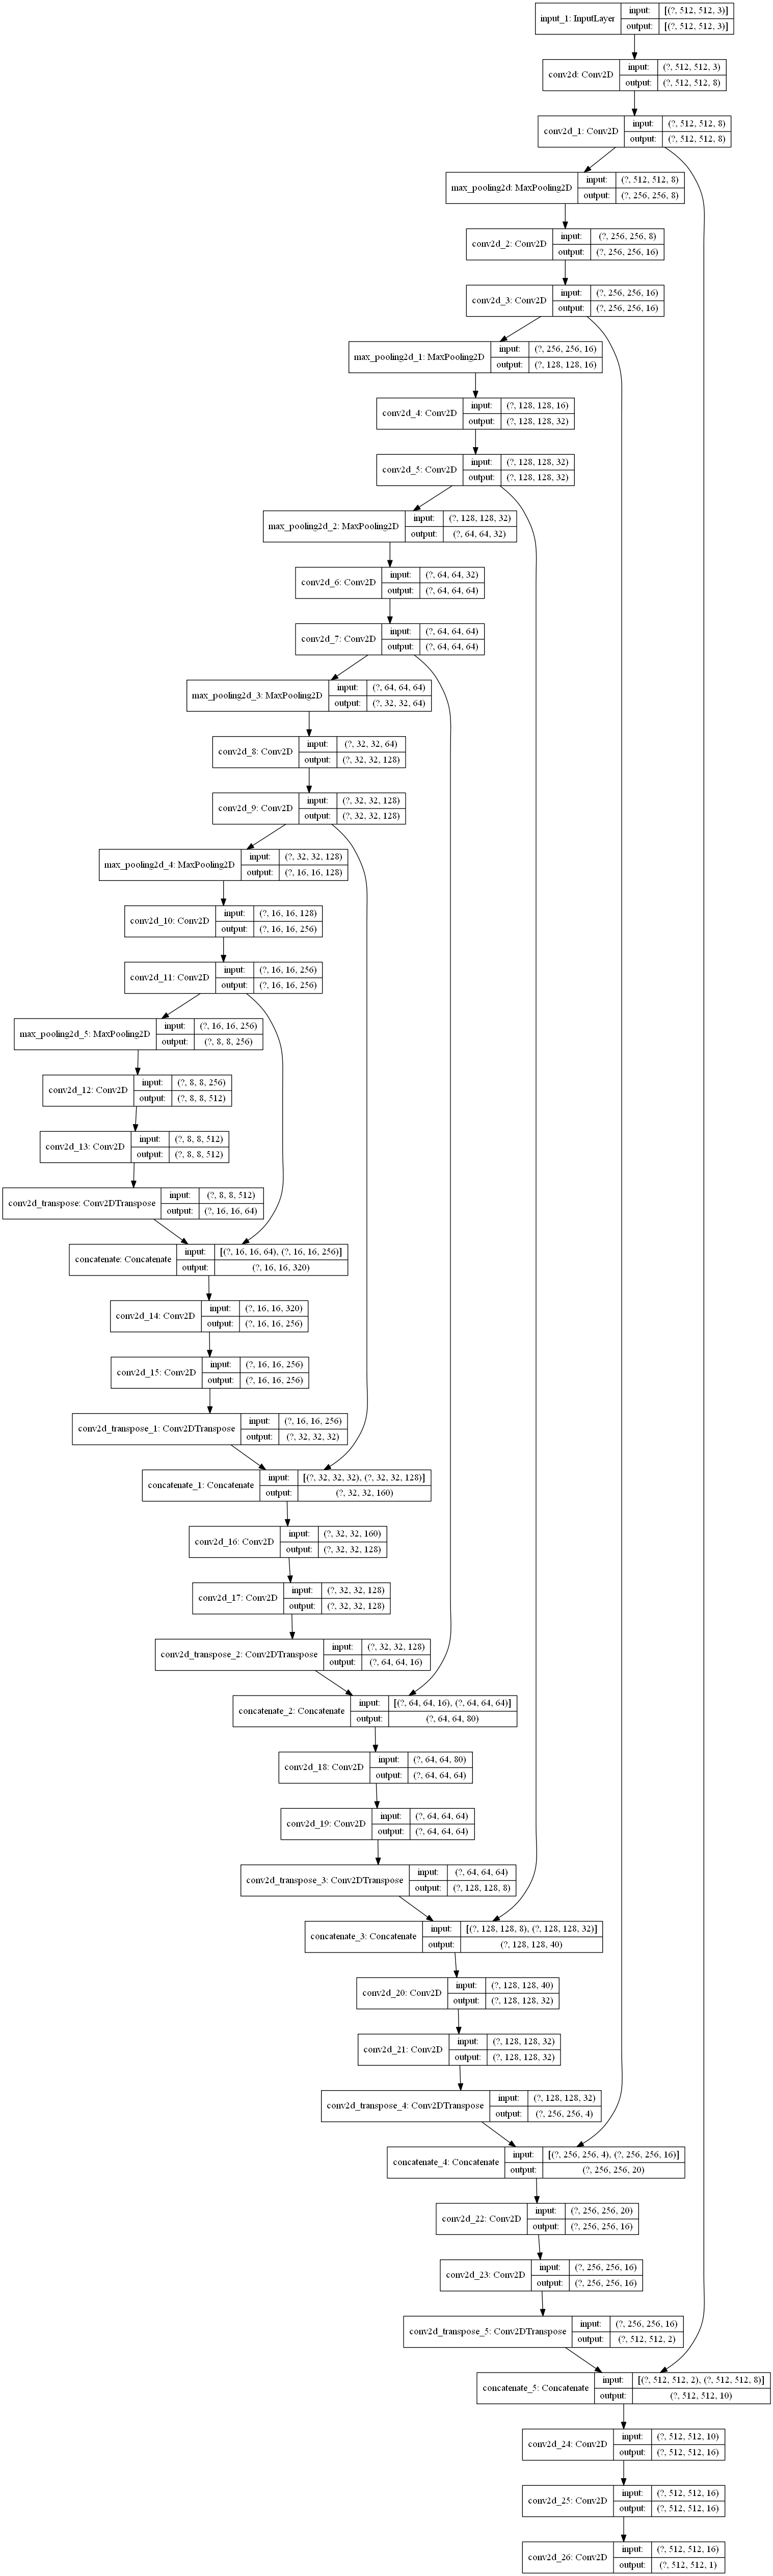

In [24]:
plot_model(model,to_file='modelo.png', show_shapes=True, show_layer_names=True)

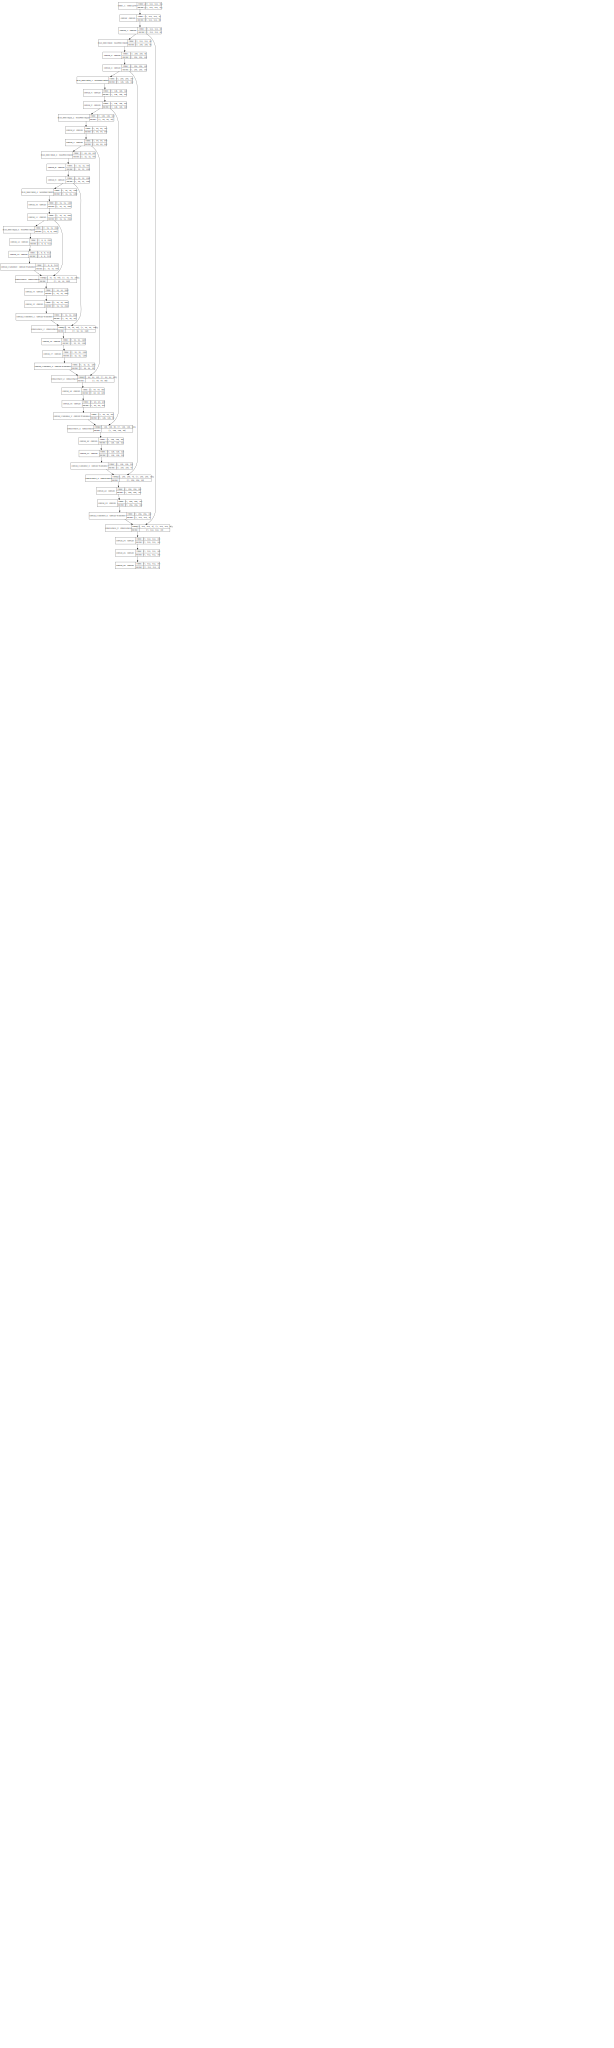

In [37]:
SVG(model_to_dot(
    model,
    show_shapes=True,
    #show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=20,
    subgraph=False).create(prog='dot', format='svg'))